<a href="https://colab.research.google.com/github/evcereti/Aprendiendo_ML_y_DS/blob/main/regresion_lineal_multiple_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresion Lineal Multiple con Scikit-Learn

##Importando las librerias necesarias

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Importando el conjunto de datos

In [18]:
dataset = pd.read_csv('50_Startups.csv')

#Analisis Exploratorio de los Datos

In [19]:
dataset.shape

(50, 5)

In [20]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
dataset.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


En esta dataset, observamos que se tienen 5 columnas, la mayoría numéricas, una de ellas Categórica (States) y la última (Profit) representa ganancias.

Tambien notamos que la muestra está compuesta de 50 puntos muestrales y que ninguno de ellos presenta información faltante.

Observamos que podemos predecir la variable Ganancias utilizando un modelo de regresión múltiple, siempre que exista una relación aproximadamente lineal en estas variables.

<Axes: >

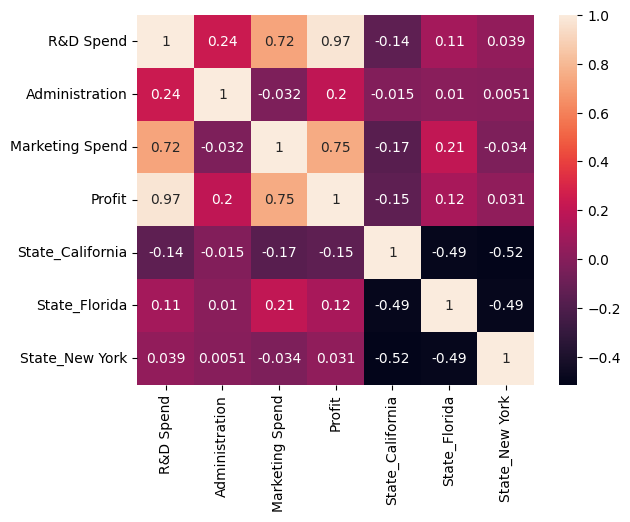

In [22]:
import seaborn as sns
categorias = dataset.select_dtypes(include=['object']).columns
dataset_one_hot = pd.get_dummies(dataset, categorias)
sns.heatmap(dataset_one_hot.corr(), annot=True)

Observando la matriz de correlaciones, podemos ver que el factor que mas afecta las ganancias es R&D Spend con un valor de 0.97 y Marketing Spend con 0.75, mientras que el resto de las variables dificilmente muestran algún tipo de efecto en las ganancias.

Analicemos estas dos variables por separado.

<Axes: xlabel='R&D Spend', ylabel='Profit'>

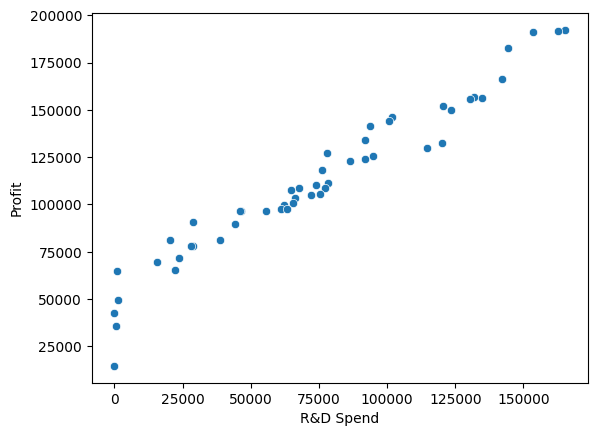

In [23]:
sns.scatterplot(x='R&D Spend', y='Profit', data=dataset)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

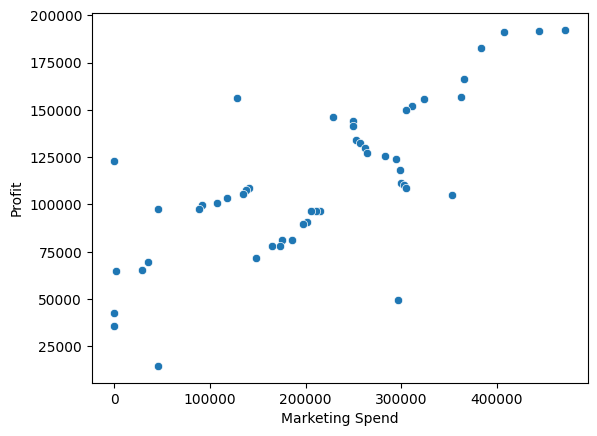

In [24]:
sns.scatterplot(x='Marketing Spend', y='Profit', data=dataset)

De los dos gráficos, observamos que tanto R&D y Marketing Spend muestran relaciones aproximadamente lineales y positivas.

Con estos datos, podemos justificar el uso de la regresión lineal en nuestro modelo.

Para empezar a diseñar el modelo, vamos a separar esta tabla en una matriz de características _X_ y su vector de etiquetas _y_

In [25]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [26]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [27]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


Analizamos la columna de estados para saber con cuantas valores diferentes tenemos que tratar.

In [28]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

Tenemos 3 estados, así que podríamos suponer que requerimos 3 vectores para codificar la informacoón:

*   New York -> (0, 0, 1)
*   California -> (0, 1, 0)
*   Florida -> (1, 0, 0)

Sin embargo, estaríamos cayendo en la _dummy variable trap_, dado que un estado se puede deducir de los otros dos (Si no estamos en New York y no estamos en Florida entonces estamos en California). Tomando esto en cuenta, deberíamos usar la siguiente estrategia.

1.   New York -> (0, 1)
2.   California -> (1, 0)
3.   Florida -> (1, 1)

Nota: Scikit-learn nos provee del modulo One-Hot-Encoding que realiza automáticamente este paso.

In [29]:
dummy_states = pd.get_dummies(X['State'], drop_first=True)
X = X.drop('State', axis=1)
X = pd.concat([X, dummy_states], axis=1)


In [30]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


Nuestra aproximación lineal tendrá la siguiente ecuacion de 5 incógnitas

$y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 + b_4x_4 + b_5x_5$

donde $b_0,..., b_5$ son los coeficientes a aproximar, y

*   $b_0$: _bias_
*   $x_1$: RD Spend
*   $x_2$: Administration
*   $x_3$: Marketing Spend
*   $x_4$: Florida
*   $x_5$: New York



##Separando los datos en los subconjuntos de Entrenamiento y Tests

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Entrenando el modelo

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

##Realizando las predicciones

In [33]:
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

##Analizando la exactitud del modelo

Para analizar la validez de un modelo de regresión lineal podemos utilizar el test estadistico $R^2$. Si el test resulta en un número cercano a 1, podemos asumir que las predicciones realizadas serán las correctas dentro de su intervalo de validez.

Utlizando scikit-learn para esto

In [34]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score


0.9347068473282423

<Axes: xlabel='Profit', ylabel='Density'>

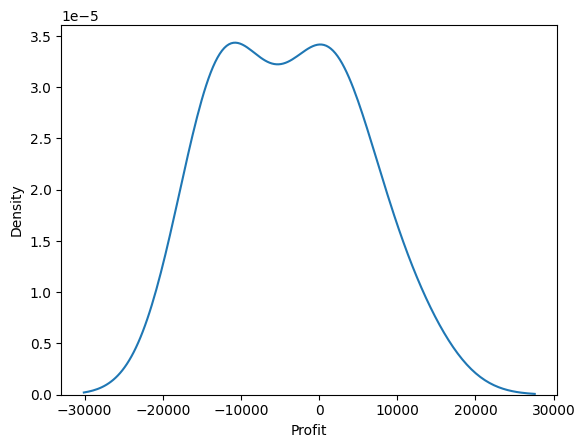

In [35]:
sns.kdeplot(y_pred - y_test)

bservamos que el test $R^2$ resulta en 0.93, muy cercano a 1, y que la diferencia entre ambas distribuciones es muy pequeña. El modelo se asume correcto.